In [1]:
import glob
filenames = glob.glob('/home/jxm3/research/retrieval/inversion/embeddings/binary/*')
filenames

['/home/jxm3/research/retrieval/inversion/embeddings/binary/bert-base-uncased__32__True__128.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/roberta-base__32__False__128.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/bert-base-uncased__32__False__128.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/distilbert-base-uncased__32__False__128.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/bert-base-uncased__32__True__256.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/roberta-base__32__True__256.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/distilbert-base-uncased__32__False__256.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/bert-base-uncased__32__False__256.p',
 '/home/jxm3/research/retrieval/inversion/embeddings/binary/roberta-base__32__False__256.p']

In [2]:
import re

s = '/home/jxm3/research/retrieval/inversion/embeddings/binary/bert-base-uncased__32__True__128.p'
p = s.split('/')[-1]
p.strip('.p').split('__')

['bert-base-uncased', '32', 'True', '128']

In [3]:
import pandas as pd

def load_df(s: str) -> pd.DataFrame:
    p = s.split('/')[-1] # get filename without extension
    model_name, seq_length, frozen, n = p.strip('.p').split('__') # split into components
    
    df = pd.read_pickle(s)
    df['model_name'] = model_name
    df['seq_length'] = int(seq_length)
    df['frozen'] = eval(frozen)
    df['n'] = int(n)
    return df
    

dfs = list(map(load_df, filenames))
df = pd.concat(dfs, axis=0)
df.shape

(89776128, 9)

In [4]:
sum_df = df.groupby(['layer', 'model_name', 'frozen']).sum().reset_index()
sum_df.head()
# max_bit_value = (768 * 32 * 32) # dim * bits * seq length
# bert_layer['theoretical_max_bits'] = max_bit_value

,layer,model_name,frozen,sequence,embedding_dim,bit_idx,bit_value,seq_length,n
0,0,bert-base-uncased,False,24379392,603193344,24379392,1.210441e+06,50331648,301989888
1,0,bert-base-uncased,True,24379392,603193344,24379392,1.331324e+06,50331648,301989888
2,0,distilbert-base-uncased,False,24379392,603193344,24379392,1.213781e+06,50331648,301989888
3,0,roberta-base,False,24379392,603193344,24379392,1.225129e+06,50331648,301989888
4,0,roberta-base,True,12189696,301596672,12189696,6.674801e+05,25165824,201326592


In [5]:
sum_df['frozen'].value_counts()

False    39
True     30
Name: frozen, dtype: int64

<AxesSubplot:xlabel='layer', ylabel='bit_value'>

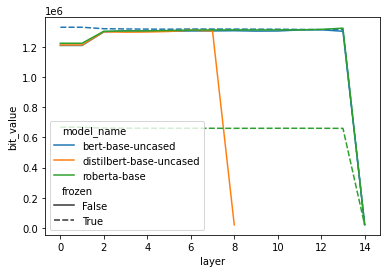

In [6]:
import seaborn as sns
sns.lineplot(data=sum_df, x='layer', y='bit_value', hue='model_name', style='frozen')

<AxesSubplot:xlabel='layer', ylabel='bit_value'>

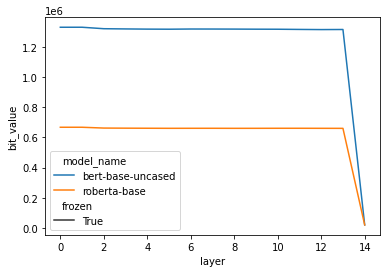

In [8]:
sns.lineplot(data=sum_df[sum_df['frozen']], x='layer', y='bit_value', hue='model_name', style='frozen')

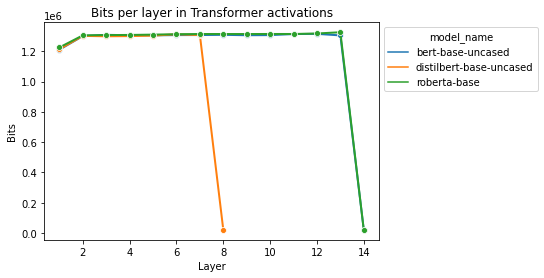

In [19]:
ax = sns.lineplot(data=sum_df[(~sum_df['frozen']) & (sum_df['layer'] >= 1)], x='layer', y='bit_value', hue='model_name', marker='o', linewidth=2)
ax.set_xlabel('Layer')
ax.set_ylabel('Bits')
ax.set_title('Bits per layer in Transformer activations')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))